# Analyzing the dataset to find the data

In [81]:
import pandas as pd
import numpy as np

cases = pd.read_csv('../../Team/covid_confirmed_usafacts.csv')
cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149


#### Find the last week of data of New York and check if its ascending or descending (This is New York Only)

In [79]:
ny_df = cases[cases['State'] == 'NY']

# Get the last seven days (last week) of data
date_columns = ny_df.columns[-7:]
date_columns
ny_df[date_columns]
trends_df = ny_df[date_columns]
last_week_sum_df = trends_df.sum().to_frame().rename(columns={0: "sum_of_day"})
last_week_sum_df

,sum_of_day
2023-07-17,6703386
2023-07-18,6703386
2023-07-19,6706390
2023-07-20,6706390
2023-07-21,6706390
2023-07-22,6706390
2023-07-23,6706390


#### Lets show a neat graph with matplotlib to show the trend

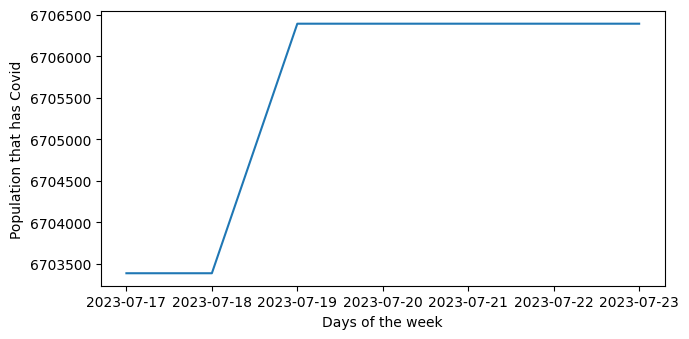

In [78]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True



xs = last_week_sum_df.index.to_list()
ys = last_week_sum_df["sum_of_day"].to_list()

fig, ax = plt.subplots()

plt.ylabel("Population that has Covid")
plt.xlabel("Days of the week")

# Remove the scientific notation
ax.ticklabel_format(useOffset=False, style='plain')

ax.plot(xs, ys)


plt.show()

##### Notice it increased by 3000 over the plan from 7-18 to 7-19

#### Showing the Enrichment Dataset that I am using is the US Census with Counties included

In [141]:
census = pd.read_csv("./data/USCensusWithPopulationCSV.csv")

# Can't work with the vertical data so transpose to get Counties available as a column
transposed_census = census.T

# Simply we change the column names to be correct instead of numbers
column_names = census["Label (Grouping)"].to_list() 
transposed_census.columns = column_names

# We don't need the Label grouping but this will come back later
transposed_census = transposed_census.drop("Label (Grouping)")

# Changing the index to look nicer
transposed_census.index.name = "County Name"
transposed_census = transposed_census.reset_index()

# This part is weird, we take multiplier and multiply it my the amount of estimate strings for a new column
multiplier_for_new_column = int(transposed_census.shape[0] / 4)

# We make a new column that extracts the estimate label from the County since we need only the county name to merge as the pkey
estimation_column = ['Estimate', 'Margin of Error', 'Percent', 'Percent Margin of Error'] * multiplier_for_new_column

# Add the column into the new dataframe
transposed_census['Estimation Label'] = estimation_column

# Fun inline for loop to change the county name from having the estimates inside to just the county names
transposed_census['County Name'] = [county.split(",")[0] for county in transposed_census['County Name'].to_list()]
transposed_census





,County Name,SEX AND AGE,Total population,Male,Female,Sex ratio (males per 100 females),Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,...,Some other race alone,Two or more races,Two races including Some other race,"Two races excluding Some other race, and Three or more races",Total housing units,"CITIZEN, VOTING AGE POPULATION","Citizen, 18 and over population",Male,Female,Estimation Label
0,Baldwin County,NaN,"218,022","105,437","112,585",93.7,"10,878","9,445","18,093","13,489",...,148,"2,896",127,"2,769","116,632",NaN,"168,104","79,962","88,142",Estimate
1,Baldwin County,NaN,*****,"±1,410","±1,410",±2.4,±742,"±1,547","±1,858",±986,...,±179,±922,±161,±892,±624,NaN,"±1,364",±839,"±1,072",Margin of Error
2,Baldwin County,NaN,"218,022",48.4%,51.6%,(X),5.0%,4.3%,8.3%,6.2%,...,0.1%,1.3%,0.1%,1.3%,(X),NaN,"168,104",47.6%,52.4%,Percent
3,Baldwin County,NaN,(X),±0.6,±0.6,(X),±0.3,±0.7,±0.9,±0.5,...,±0.1,±0.4,±0.1,±0.4,(X),NaN,(X),±0.4,±0.4,Percent Margin of Error
4,Calhoun County,NaN,"114,277","55,054","59,223",93.0,"7,142","7,158","5,968","7,386",...,0,"2,230",293,"1,937","53,888",NaN,"88,763","42,180","46,583",Estimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3347,Toa Baja Municipio,NaN,(X),*****,*****,(X),*****,±1.3,±1.3,*****,...,N,N,N,N,(X),NaN,(X),±0.4,±0.4,Percent Margin of Error
3348,Trujillo Alto Municipio,NaN,"63,746","30,372","33,374",91.0,"2,312","3,596","3,614","3,964",...,N,N,N,N,"29,294",NaN,"51,309","23,423","27,886",Estimate
3349,Trujillo Alto Municipio,NaN,*****,±343,±343,±2.0,*****,±855,±855,±654,...,N,N,N,N,"±1,128",NaN,±340,±240,±233,Margin of Error
3350,Trujillo Alto Municipio,NaN,"63,746",47.6%,52.4%,(X),3.6%,5.6%,5.7%,6.2%,...,N,N,N,N,(X),NaN,"51,309",45.7%,54.3%,Percent


#### Potential glaring issues with this implementation:
The original dataset had these empty rows that were labels that represented the data for that row, for example
the estimates of the SEX AND AGE are different from CITIZEN VOTING AGE POPULATION. I couldn't really do anything about these
so this data will be tough to utilize. The easiest way to fix this would be to include SEX AND AGE into each of the estimates
for example: Total Population_SEX_AND_AGE. That way we would know Total Population for that column reffered to SEX AND AGE group estimate.

In [131]:
cases_df = pd.read_csv("../../Team/covid_confirmed_usafacts.csv")
deaths_df = pd.read_csv("../../Team/covid_deaths_usafacts.csv")
population_df = pd.read_csv("../../Team/covid_county_population_usafacts.csv")

cases_deaths = pd.merge(cases_df, deaths_df, on='countyFIPS', suffixes=('_cases', '_deaths'))
covid_df = pd.merge(cases_deaths, population_df, on='countyFIPS')


covid_df[covid_df["County Name_cases"] != "Statewide Unallocated"]

# Creates the super covid df

,countyFIPS,County Name_cases,State_cases,StateFIPS_cases,2020-01-22_cases,2020-01-23_cases,2020-01-24_cases,2020-01-25_cases,2020-01-26_cases,2020-01-27_cases,...,2023-07-17_deaths,2023-07-18_deaths,2023-07-19_deaths,2023-07-20_deaths,2023-07-21_deaths,2023-07-22_deaths,2023-07-23_deaths,County Name,State,population
132651,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,Autauga County,AL,55869
132652,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,Baldwin County,AL,223234
132653,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,Barbour County,AL,24686
132654,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,Bibb County,AL,22394
132655,1009,Blount County,AL,1,0,0,0,0,0,0,...,261,261,261,261,261,261,261,Blount County,AL,57826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135788,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,142,142,142,142,142,142,142,Sweetwater County,WY,42343
135789,56039,Teton County,WY,56,0,0,0,0,0,0,...,16,16,16,16,16,16,16,Teton County,WY,23464
135790,56041,Uinta County,WY,56,0,0,0,0,0,0,...,43,43,43,43,43,43,43,Uinta County,WY,20226
135791,56043,Washakie County,WY,56,0,0,0,0,0,0,...,51,51,51,51,51,51,51,Washakie County,WY,7805


#### Merge the enrichment df with the super covid df

In [147]:
merged_df = covid_df.merge(on="County Name", how="inner", right=transposed_census)
merged_df

,countyFIPS,County Name_cases,State_cases,StateFIPS_cases,2020-01-22_cases,2020-01-23_cases,2020-01-24_cases,2020-01-25_cases,2020-01-26_cases,2020-01-27_cases,...,Some other race alone,Two or more races,Two races including Some other race,"Two races excluding Some other race, and Three or more races",Total housing units,"CITIZEN, VOTING AGE POPULATION","Citizen, 18 and over population",Male,Female,Estimation Label
0,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,148,"2,896",127,"2,769","116,632",NaN,"168,104","79,962","88,142",Estimate
1,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,±179,±922,±161,±892,±624,NaN,"±1,364",±839,"±1,072",Margin of Error
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,0.1%,1.3%,0.1%,1.3%,(X),NaN,"168,104",47.6%,52.4%,Percent
3,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,±0.1,±0.4,±0.1,±0.4,(X),NaN,(X),±0.4,±0.4,Percent Margin of Error
4,13009,Baldwin County,GA,13,0,0,0,0,0,0,...,148,"2,896",127,"2,769","116,632",NaN,"168,104","79,962","88,142",Estimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14135,56021,Laramie County,WY,56,0,0,0,0,0,0,...,±0.1,±0.7,±0.2,±0.7,(X),NaN,(X),±0.8,±0.8,Percent Margin of Error
14136,56025,Natrona County,WY,56,0,0,0,0,0,0,...,N,N,N,N,"37,181",NaN,"59,620","29,497","30,123",Estimate
14137,56025,Natrona County,WY,56,0,0,0,0,0,0,...,N,N,N,N,±276,NaN,±741,±581,±549,Margin of Error
14138,56025,Natrona County,WY,56,0,0,0,0,0,0,...,N,N,N,N,(X),NaN,"59,620",49.5%,50.5%,Percent
